## Gaussian Processes intro - Intuition
Highly inspired on **Chris Fonnesbeck** (*Vanderbilt University Medical Center*)  
https://github.com/fonnesbeck/bayesian_mixer_london_2017

- Gaussian process generalizes the multivariate normal to infinite dimension
- Infinite vector ~ **_function_**
- Gaussian process = **_distribution over functions_**  
- GP is fully specified by **mean** and **covariance**

$$p(x) \sim \mathcal{GP}(m(x), k(x,x^{\prime}))$$

$$\begin{aligned}
m(x) &=0 \\
k(x,x^{\prime}) &= \theta_1\exp\left(-\frac{\theta_2}{2}(x-x^{\prime})^2\right)
\end{aligned}$$

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.cm as cmap
sns.set_context('talk')

In [2]:
np.random.seed(42)

def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

## Conditional proprietry of multivariate Gaussian Distributions

In [3]:
def conditional(x_new, x, y, params):
    B = exponential_cov(x_new, x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())

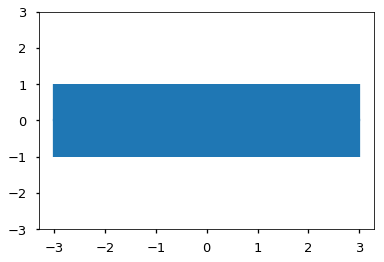

In [6]:
## Gaussian Prior teta = 1,10, zero mean
θ = [1, 10]
σ_0 = exponential_cov(0, 0, θ)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=σ_0, capsize=0)
plt.ylim(-3, 3);

## Conditioning in a first point

In [7]:
x = [1.]
y = [np.random.normal(scale=σ_0)]
y

[0.4967141530112327]

In [8]:
σ_1 = exponential_cov(x, x, θ)
σ_1

array([[1.]])

In [9]:
def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

In [10]:
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, θ, σ_1, y) for i in x_pred]

In [11]:
print(x_pred.shape)

(1000,)


In [12]:
predictions

[(8.964952284247832e-36, 1.0),
 (1.1397370424705615e-35, 1.0),
 (1.4484539263965649e-35, 1.0),
 (1.8401280607899593e-35, 1.0),
 (2.3368710674175548e-35, 1.0),
 (2.9666396440562554e-35, 1.0),
 (3.764767677767483e-35, 1.0),
 (4.775896508526845e-35, 1.0),
 (6.056405903563101e-35, 1.0),
 (7.677474484878087e-35, 1.0),
 (9.72893115722918e-35, 1.0),
 (1.2324100170880088e-34, 1.0),
 (1.5605893893992313e-34, 1.0),
 (1.975447174805388e-34, 1.0),
 (2.499686429952123e-34, 1.0),
 (3.1619062220367533e-34, 1.0),
 (3.998119573761284e-34, 1.0),
 (5.05365875258335e-34, 1.0),
 (6.385565852613862e-34, 1.0),
 (8.06559115707682e-34, 1.0),
 (1.0183952398746084e-33, 1.0),
 (1.2854046251914558e-33, 1.0),
 (1.621835105311642e-33, 1.0),
 (2.0455819171834745e-33, 1.0),
 (2.5791131510096197e-33, 1.0),
 (3.2506278869541e-33, 1.0),
 (4.0955049815953456e-33, 1.0),
 (5.158114769118253e-33, 1.0),
 (6.494083738936134e-33, 1.0),
 (8.173124388275998e-33, 1.0),
 (1.0282569973145086e-32, 1.0),
 (1.2931788092340988e-32, 1.0)

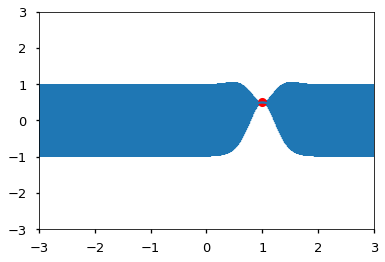

In [13]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3);

## Condition on a second point

In [14]:
point = -0.7
m, s = conditional([point], x, y, θ)
y2 = np.random.normal(m, s)
x.append(point)
y.append(y2)

In [15]:
x, y

([1.0, -0.7], [0.4967141530112327, -0.1382640378102619])

In [16]:
σ_2 = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_2, y) for i in x_pred]

In [17]:
σ_2

array([[1.0000000e+00, 5.3020612e-07],
       [5.3020612e-07, 1.0000000e+00]])

In [18]:
predictions

[(-4.504234747533777e-13, 1.0),
 (-5.170533045927396e-13, 1.0),
 (-5.93325427072544e-13, 1.0),
 (-6.806031326309126e-13, 1.0),
 (-7.804377491803457e-13, 1.0),
 (-8.945939001290803e-13, 1.0),
 (-1.025078059845966e-12, 1.0),
 (-1.1741708239568569e-12, 1.0),
 (-1.3444633629377127e-12, 1.0),
 (-1.5388985845700429e-12, 1.0),
 (-1.7608175946252593e-12, 1.0),
 (-2.014012116403401e-12, 1.0),
 (-2.30278360930226e-12, 1.0),
 (-2.632009915357398e-12, 1.0),
 (-3.007220361699432e-12, 1.0),
 (-3.4346803572445426e-12, 1.0),
 (-3.92148664492365e-12, 1.0),
 (-4.475674507739947e-12, 1.0),
 (-5.106338379442669e-12, 1.0),
 (-5.823767480306333e-12, 1.0),
 (-6.6395982872459694e-12, 1.0),
 (-7.566985857333059e-12, 1.0),
 (-8.620796256947194e-12, 1.0),
 (-9.817822607769786e-12, 1.0),
 (-1.1177027548339728e-11, 1.0),
 (-1.2719815228917287e-11, 1.0),
 (-1.4470336311248359e-11, 1.0),
 (-1.6455829837095177e-11, 1.0),
 (-1.8707006264058317e-11, 1.0),
 (-2.1258476448635692e-11, 1.0),
 (-2.4149231889389917e-11, 1.0)

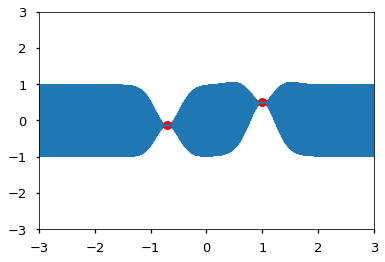

In [19]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3);

## Sampling on more points

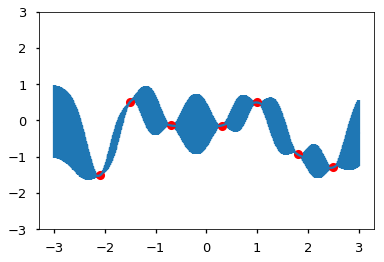

In [20]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, θ)
y_more = np.random.multivariate_normal(mu, s)
x += x_more
y += y_more.tolist()

σ_new = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_new, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.ylim(-3, 3);

In [21]:
σ_new.shape

(7, 7)